# Advertising Sales Channel Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining the data

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


* This method print the information about the DataFrame including the index type and columns type,non-null values and memory usage.

In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

* Here the all null values are zero

In [7]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [8]:
df.shape

(200, 5)

* Dataset contains 200 rows and 5 columns

In [9]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

* Dataset contains 5 columns

# Summary Statistics

In [10]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


1. The mean is more than median 50% percentile in all columns.

2. There is a large difference in 75% percentile and max in Unnamed:0 and TV.

3. The 1 and 2 observation suggest that there are extreme outliers present in these three columns.



In [11]:
df.sales.unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

* Target/dependent variable is discrete and categorical in nature

In [13]:
df.sales.value_counts()

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
       ..
25.5    1
15.6    1
17.6    1
3.2     1
20.8    1
Name: sales, Length: 121, dtype: int64

* Here all the sales values are higly concentrated

In [12]:
df.TV.unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

* Target/dependent variables is discrete and categorial in nature 

In [15]:
df.TV.value_counts()

76.4     2
17.2     2
240.1    2
197.6    2
184.9    2
        ..
117.2    1
289.7    1
137.9    1
220.5    1
13.1     1
Name: TV, Length: 190, dtype: int64

* Here all the TV values are higly concentrated

# Data Visualizations

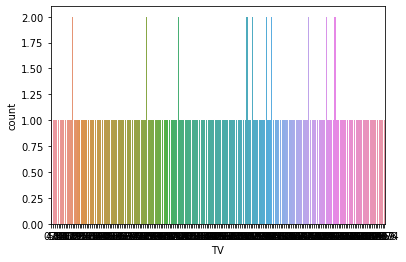

In [16]:
sns.countplot(df['TV']);

* Data contains all columns distribution will be same.m

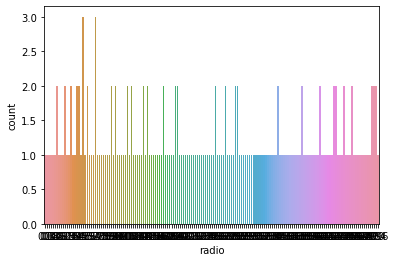

In [18]:
sns.countplot(df['radio']);

* Data distribution normally in all the columns.

<AxesSubplot:xlabel='newspaper', ylabel='count'>

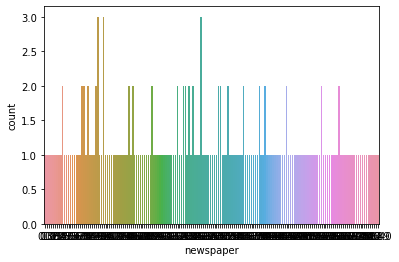

In [19]:
sns.countplot(df['newspaper'])

* Normally distribution in all the columns of dataset

<AxesSubplot:xlabel='sales', ylabel='count'>

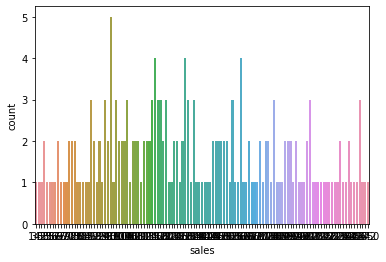

In [20]:
sns.countplot(df['sales'])

* Normally distribution in all the columns of dataset

<AxesSubplot:>

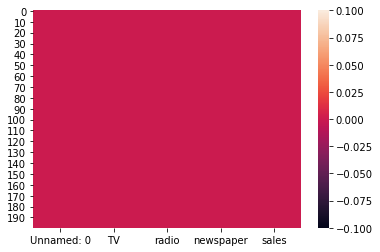

In [21]:
sns.heatmap(df.isnull())

* Heatmap contains all the null values in dataset

In [22]:
dfcor=df.corr()
dfcor

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

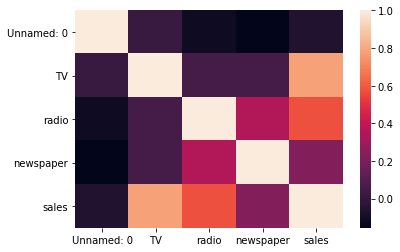

In [23]:
sns.heatmap(dfcor)

* Heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

<AxesSubplot:>

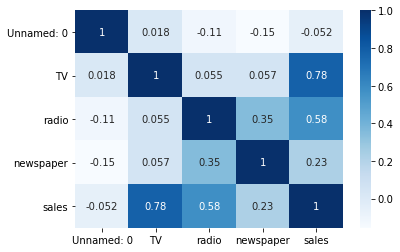

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor, cmap='Blues',annot=True)

* Dark shades are higly correlated

<AxesSubplot:>

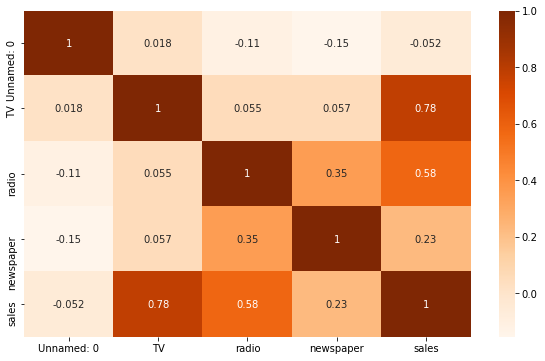

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)


* Light shades are higly correlated

* sales is higly correlated with newspaper

* newspaper is highly negatively correlated with TV

* TV is higly positively correlated with Unnamed:0

* TV is negatively correlated with Sales

* radio is highly correlated with mewspaper



# Plotting Outliers

In [26]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:>

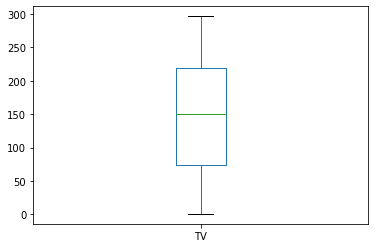

In [27]:
df['TV'].plot.box()

<AxesSubplot:>

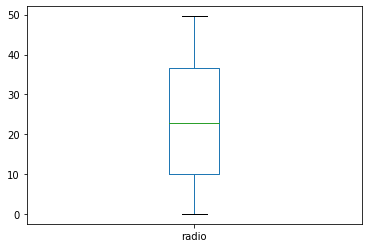

In [28]:
df['radio'].plot.box()

* Here tv and radio have no outside viscous so we cant find outliers easily.

<AxesSubplot:>

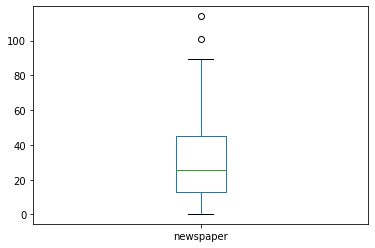

In [29]:
df['newspaper'].plot.box()

* Here newspaper have outside viscous so we can find outliers easily.


<AxesSubplot:>

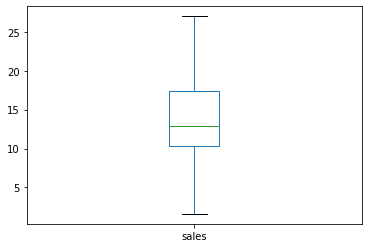

In [30]:
df['sales'].plot.box()

In [31]:
df.shape

(200, 5)

* Dataset contains 200 rows and 5 columns

In [32]:
collist=df.columns.values
ncol=5
nrows=10

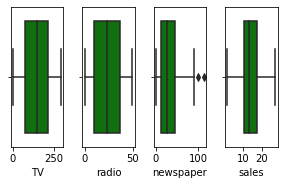

In [33]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green', orient='v')
    plt.tight_layout()

* We have the collist of the all outliers.

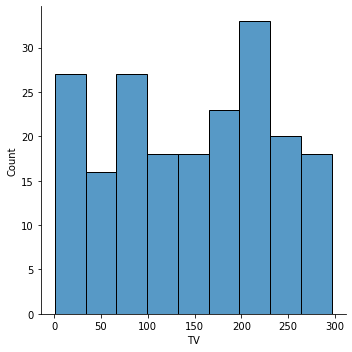

In [34]:
sns.displot(df['TV'])

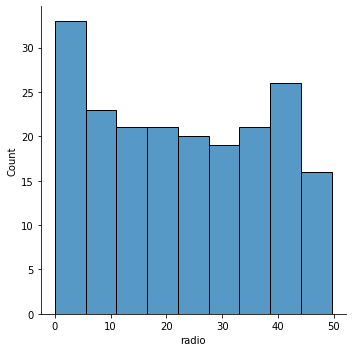

In [35]:
sns.displot(df['radio'])

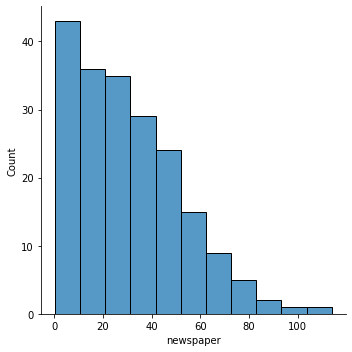

In [36]:
sns.displot(df['newspaper'])

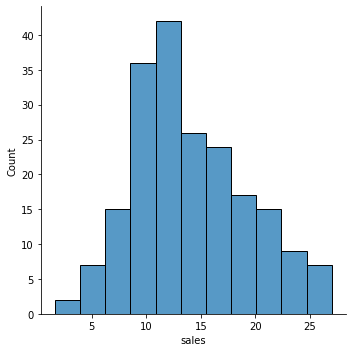

In [37]:
sns.displot(df['sales'])

* Data is not normally distributed in the TV,Radio,newspaper and sales columns.

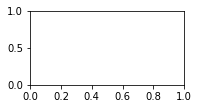

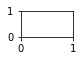

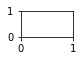

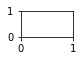

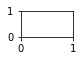

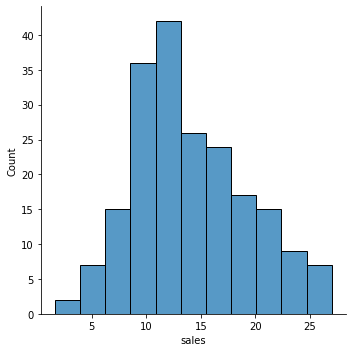

In [39]:
# plt.figure (figsize=(5*totalcol.5*totalcol))

plt.figure(figsize=(16,16))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.displot(df[collist[i]])
    plt.tight_layout()

* Other independent variables are right skewed/positively skewed

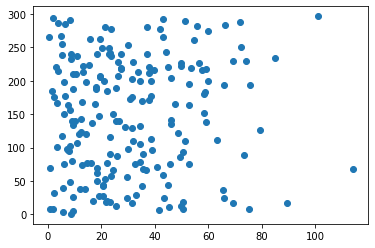

In [40]:
plt.scatter(df['newspaper'],df['TV'])

* Here scattiring plot values of newspaper and TV

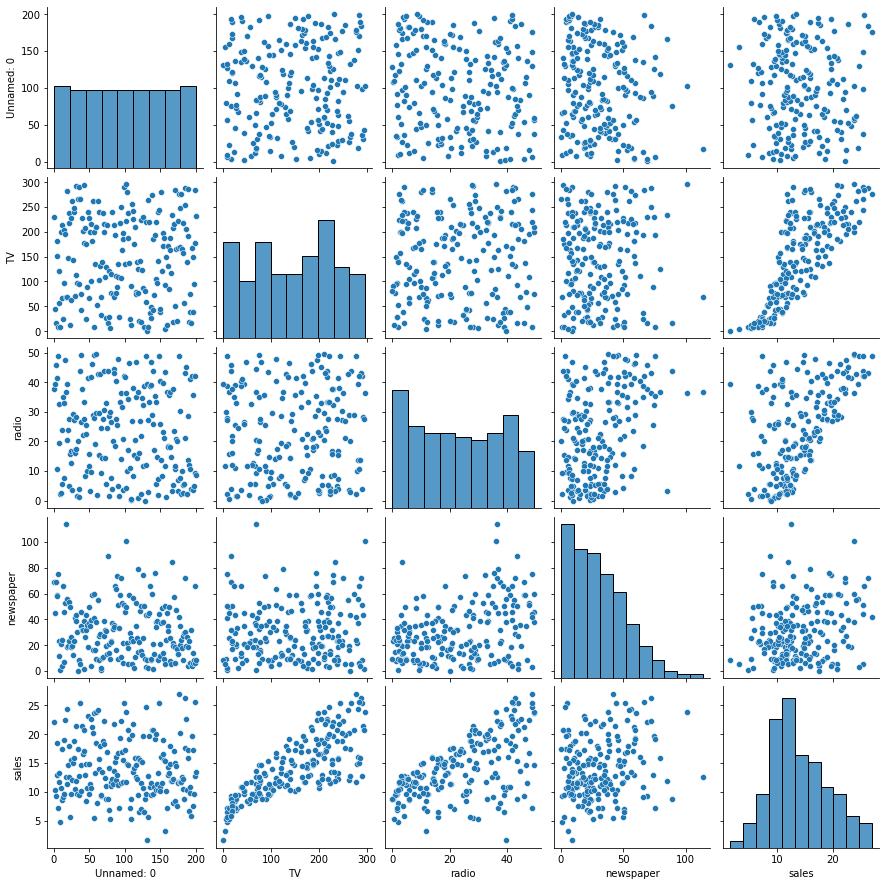

In [41]:
sns.pairplot(df)

* Remove the missing values.

* drop the nagativity correlated columns.

* remove the outliers.



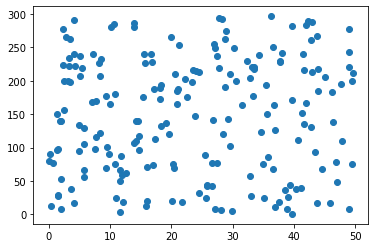

In [42]:
plt.scatter(df['radio'],df['TV'])
plt.show()

* Here scatter plot of radio and TV

In [43]:
df.drop('radio',axis=1,inplace=True)

In [44]:
df.head()

,Unnamed: 0,TV,newspaper,sales
0,1,230.1,69.2,22.1
1,2,44.5,45.1,10.4
2,3,17.2,69.3,9.3
3,4,151.5,58.5,18.5
4,5,180.8,58.4,12.9


In [46]:
df.shape

(200, 4)

* Dataset contains 200 rows and 4 columns

In [47]:
df.head()

,Unnamed: 0,TV,newspaper,sales
0,1,230.1,69.2,22.1
1,2,44.5,45.1,10.4
2,3,17.2,69.3,9.3
3,4,151.5,58.5,18.5
4,5,180.8,58.4,12.9


In [48]:
df.columns

Index(['Unnamed: 0', 'TV', 'newspaper', 'sales'], dtype='object')

# Removing Outliers

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 1.77894547e+00, 1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 6.69578760e-01, 6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.78354865e+00, 9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.28640506e+00, 8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 1.28180188e+00, 2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 2.04592999e+00, 1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 3.24708413e-01, 4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 8.72486994e-01, 1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.36042422e+00, 1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 4.30581584e-01, 6.57617064e-01],
       [1.55020485e+00, 9.45155670e-01, 2.92486143e-01, 1.04190753e+00],
       [1.53288413e+00, 7.90028350e-01, 1.22232878e+00, 6.48970529e-01],
       [1.51556340e+00, 1.43908760e+00, 1.62704048e+00, 9.26620392e-01],
       [1.49824268e+00, 5.78501712e-01, 1.07502697e

* Here removed outliers of dataset


In [50]:
threshold=3
print(np.where(z>3)) 

(array([ 16, 101]), array([2, 2]))


* Thershold is 3 and print np where z>3


In [51]:
df_new=df[(z<3).all(axis=1)]

In [52]:
df_new

,Unnamed: 0,TV,newspaper,sales
0,1,230.1,69.2,22.1
1,2,44.5,45.1,10.4
2,3,17.2,69.3,9.3
3,4,151.5,58.5,18.5
4,5,180.8,58.4,12.9
...,...,...,...,...
195,196,38.2,13.8,7.6
196,197,94.2,8.1,9.7
197,198,177.0,6.4,12.8
198,199,283.6,66.2,25.5


In [53]:
df.shape

(200, 4)

* Dataset contains 198 rows and 4 columns

In [54]:
df_new.shape

(198, 4)

* Dataset contains 198 rows and 4 columns


# Feature Engineering

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [56]:
scaledX

array([[-1.72341210e+00,  9.69852266e-01,  1.77894547e+00,
         1.55205313e+00],
       [-1.70609137e+00, -1.19737623e+00,  6.69578760e-01,
        -6.96046111e-01],
       [-1.68877065e+00, -1.51615499e+00,  1.78354865e+00,
        -9.07405869e-01],
       [-1.67144992e+00,  5.20496822e-02,  1.28640506e+00,
         8.60330287e-01],
       [-1.65412920e+00,  3.94182198e-01,  1.28180188e+00,
        -2.15683025e-01],
       [-1.63680847e+00, -1.61540845e+00,  2.04592999e+00,
        -1.31091086e+00],
       [-1.61948775e+00, -1.04557682e+00, -3.24708413e-01,
        -4.27042783e-01],
       [-1.60216702e+00, -3.13436589e-01, -8.72486994e-01,
        -1.58039455e-01],
       [-1.58484630e+00, -1.61657614e+00, -1.36042422e+00,
        -1.77205942e+00],
       [-1.56752558e+00,  6.16042873e-01, -4.30581584e-01,
        -6.57617064e-01],
       [-1.55020485e+00, -9.45155670e-01, -2.92486143e-01,
        -1.04190753e+00],
       [-1.53288413e+00,  7.90028350e-01, -1.22232878e+00,
      

* The standard scaler values of the following


In [58]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [59]:
Y.explained_variance_ratio_

array([0.45904603, 0.2833742 , 0.20808651, 0.04949325])

* The varience accuracy ratio of PCA

In [61]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 45.90460298,  74.24202341,  95.0506749 , 100.        ])

* The varience accracy ratio of PCA


In [62]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 3


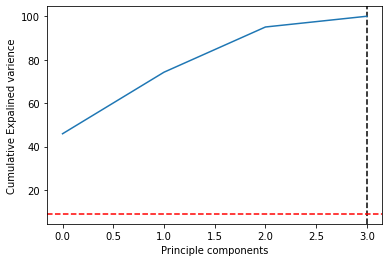

In [63]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

* Here the y label define the cumulative explained varience and x label defined the principal components


# Checking Skewness

In [64]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
newspaper     0.894720
sales         0.407571
dtype: float64

# Regression ,Methods

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [66]:
x = df.drop(['TV'],axis=1)
y = df["sales"]

In [67]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

0.26713973190754753
0.26657195287690344
0.34089898974934096
0.5361196157801377
0.27386127875258304
0.14822178304721914
0.21213203435596412
0.2815003094890381
0.2755160447398498
0.20225995873897262
0.32821833088246705
0.2645751311064591
0.40694724548282735
0.28630350499024115
0.5424411712272807
0.27108088919148926
0.2763397118831029
0.6221906557649448
0.5691567393428578
0.8857457053497095
0.5317210478505366
0.3969581307590987
0.1600189382731325
0.6851233023288139
0.3138229572304239
0.2787961131853758
0.24058010698889443
0.2836451047604125
0.37193189340702343
0.27688746209726933
0.5815340215170719
0.23419753382237998
0.26883587422947713
0.3533390508399618
1.5722980672001134
0.2899843255952106
1.110691840087233
0.2912876325017677
0.2486326242032243
0.3672172175272898
0.3174233383946047
0.33439225741362755
0.2354878881270659
0.3242707435947856
0.20338052110179194
0.25405797477240244
0.13706888336846848
0.9488429956020281
0.7295702346400428
0.37132033054868957
0.18909673650694178
0.36118491

In [68]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
y_pred_regressor = regressor.predict(x_test)

In [69]:
y_pred = regressor.predict(x_test)

In [70]:
y_pred

array([17.3, 14.8, 13.3, 10.1, 12.8, 22.6, 18.5,  9.5, 10.1, 16.6, 11.4,
        9.4, 19.6, 11.5, 12.2, 12.4, 15.2, 19. ,  9.7, 14.1, 12.6,  3.2,
       21.7, 11.8, 11.9, 25.5,  9.7, 11.7, 10.4, 13.6, 20.8,  7.6, 14.7,
       17.6,  5.3,  9.7,  9.7, 16.6,  5.5, 10.8, 20.2, 10.5, 14.8, 10.9,
       14.1,  9.4, 11.7,  6.6,  6.9, 17.4, 12.6, 14.9, 24.2, 20.2, 10.5,
       10.5,  8. , 15.5, 14.8, 21.7, 24.2, 21.7, 18.5,  7.3, 12.9, 15.2])

In [71]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

* The test accuracy of decisiontreeregressor is 100

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [73]:
y_pred = regressor.predict(x_test)
y_pred

array([17.3, 14.9, 13.2, 10.1, 12.9, 22.6, 18.3,  9.5, 10.1, 16.7, 11.4,
        9.3, 19.6, 11.5, 12.2, 12.5, 15.2, 19. ,  9.7, 14. , 12.7,  1.6,
       21.4, 11.8, 11.9, 27. ,  9.7, 11.7, 10.4, 13.4, 21.2,  7.6, 14.6,
       17.2,  5.3,  9.7,  9.9, 16.6,  5.9, 10.7, 20.1, 10.6, 14.8, 10.9,
       14.2,  9.3, 11.7,  6.7,  7. , 17.4, 12.6, 15. , 24.7, 20.2, 10.6,
       10.6,  8.1, 15.5, 15. , 21.5, 23.8, 21.8, 18.4,  7.3, 12.9, 15.3])

In [74]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

100.0

* The test accuracy of logisticregressor is 100


In [75]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [76]:
y_pred = regressor.predict(x_test)
y_pred

array([17.294, 14.817, 13.265, 10.183, 12.848, 22.38 , 18.261,  9.498,
       10.18 , 16.735, 11.4  ,  9.434, 19.594, 11.486, 12.233, 12.439,
       15.171, 19.105,  9.621, 13.943, 12.682,  4.12 , 21.306, 11.808,
       11.916, 25.689,  9.644, 11.675, 10.335, 13.361, 20.817,  7.521,
       14.641, 17.229,  5.475,  9.673,  9.721, 16.731,  5.173, 10.805,
       20.075, 10.531, 14.782, 10.86 , 14.269,  9.354, 11.652,  6.504,
        6.93 , 17.392, 12.556, 14.844, 24.533, 20.131, 10.535, 10.515,
        8.119, 15.539, 14.892, 21.853, 23.876, 21.972, 18.262,  7.223,
       12.863, 15.34 ])

In [77]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

99.97

* The test accuracy of randomforestregressor is 99.97


# Cross Validation Method

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9955048279760185


# Hyperparameter Tunning

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [82]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [83]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [84]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 12}

# Evaluate The Model

In [85]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

99.4508468462677


# Saving The Model

In [86]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

# Prediction Method

In [87]:
preds = regressor.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[17.294 14.817 13.265 10.183 12.848 22.38  18.261  9.498 10.18  16.735
 11.4    9.434 19.594 11.486 12.233 12.439 15.171 19.105  9.621 13.943
 12.682  4.12  21.306 11.808 11.916 25.689  9.644 11.675 10.335 13.361
 20.817  7.521 14.641 17.229  5.475  9.673]
[17.3 14.9 13.2 10.1 12.9 22.6 18.3  9.5 10.1 16.7 11.4  9.3 19.6 11.5
 12.2 12.5 15.2 19.   9.7 14.  12.7  1.6 21.4 11.8 11.9 27.   9.7 11.7
 10.4 13.4 21.2  7.6 14.6 17.2  5.3  9.7]


* The train and test data is balanced most regressor methods hit the 99% accuracy with the datset.
